In [1049]:
#### Lab | FIFA21 ######################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

In [1050]:
data = pd.read_csv('fifa21_trainning.csv')

In [1051]:
data.shape

(13700, 102)

In [1052]:
#data.head()
#data_subset = data.iloc[:,74:102]
#data_subset.head()

In [1053]:
#Doing Transpose to delete duplicated columns

#data_subset_tr = data_subset.T
#data_subset_drop = data_subset_tr.drop_duplicates()
#data2 = pd.concat([data.iloc[:,0:74], data_subset2], axis=1)

In [1054]:
#Discussion about which columns to keep...
#drop_list_guessed = ["ID", "Nationality", "Name", "Unnamed: 0","Team & Contract", "Position", "Joined", "Contract", "Loan Date End"]
#keep_list_similar = ["ST","CF","CAM","CM","CDM","CB","GK","RB","RWB","RM","RW"]

In [1055]:
# keep list similar is a result of the transpose and dropping function from the cells before and the discussion:
keep_list_similar =['LS', 'LW', 'LF', 'LAM', 'LM', 'LCM', 'LWB', 'LDM','LB', 'LCB', 'GK']
keep_list = ["W/F","SM","IR","OVA"]
df_similar = data[keep_list_similar].copy()
df_usefull = data[keep_list].copy()
#testdata = testdata.drop(labels=drop_list_guessed, axis=1)
#testdata =  testdata.drop(labels=testdata.iloc[:,24:-1].columns, axis=1)
concanated_data = pd.concat([df_similar,df_usefull], axis = 1)

In [1056]:
df_similar.shape

(13700, 11)

In [1057]:
df_usefull.shape

(13700, 4)

In [1058]:
concanated_data.shape

(13700, 15)

In [1059]:
concanated_data.columns = [val.lower() for val in concanated_data.columns]

In [1060]:
concanated_data['ir'] = (concanated_data['ir'].str.strip('★').astype(int))
concanated_data['sm'] = (concanated_data['sm'].str.strip('★').astype(int))  
concanated_data['w/f'] = (concanated_data['w/f'].str.strip('★').astype(int))  

In [1061]:
concanated_data.head()

,ls,lw,lf,lam,lm,lcm,lwb,ldm,lb,lcb,gk,w/f,sm,ir,ova
0,58+1,61+0,62+0,63+1,63+1,63+1,59+1,59+1,58+1,54+1,15+1,4,2,1,64
1,77+0,77+0,77+0,76+1,76+1,68+2,57+2,53+2,53+2,48+2,18+2,3,4,2,77
2,73+2,80+0,79+0,80+0,79+1,74+2,59+2,56+2,53+2,41+2,12+2,4,4,2,80
3,50+2,51+0,51+0,53+2,53+2,56+2,56+2,58+2,57+2,58+2,14+2,2,2,1,59
4,56+2,59+0,59+0,61+2,62+2,63+2,64+2,64+2,63+2,61+2,15+2,2,3,1,65


In [1062]:
#cleaned_data_num['CM'].loc[2].split('+')

In [1063]:
for x in concanated_data.columns[0:-4]:
    TF_plusmins = concanated_data[x].str.match(pat = '.+-.')
    for i in range(len(concanated_data[x])):
        if TF_plusmins[i]==True:
            concanated_data[x].loc[i] = int(concanated_data[x].loc[i].split('+-')[0])
            #decided to keep the first number instead of subtracting them (since it can be a range, we take the mean)
            #concanated_data[x].loc[i] = int(concanated_data[x].loc[i].split('+-')[0])-int(concanated_data[x].loc[i].split('+-')[1])
        else:
            concanated_data[x].loc[i] = int(concanated_data[x].loc[i].split('+')[0])+int(concanated_data[x].loc[i].split('+')[1])

In [1064]:
concanated_data.head(10)

,ls,lw,lf,lam,lm,lcm,lwb,ldm,lb,lcb,gk,w/f,sm,ir,ova
0,59,61,62,64,64,64,60,60,59,55,16,4,2,1,64
1,77,77,77,77,77,70,59,55,55,50,20,3,4,2,77
2,75,80,79,80,80,76,61,58,55,43,14,4,4,2,80
3,52,51,51,55,55,58,58,60,59,60,16,2,2,1,59
4,58,59,59,63,64,65,66,66,65,63,17,2,3,1,65
5,69,70,69,71,71,68,60,57,57,51,21,4,3,1,71
6,68,68,67,70,71,72,76,76,76,76,17,5,3,2,76
7,57,59,58,62,63,61,54,54,52,48,17,2,2,1,60
8,59,54,56,58,57,63,61,65,62,68,18,2,2,1,65
9,64,63,62,65,64,66,67,67,67,68,18,3,3,1,67


In [1065]:
concanated_data.dtypes

ls     object
lw     object
lf     object
lam    object
lm     object
lcm    object
lwb    object
ldm    object
lb     object
lcb    object
gk     object
w/f     int32
sm      int32
ir      int32
ova     int64
dtype: object

In [1066]:
for val in concanated_data[0:-4]:
    concanated_data[val] =  pd.to_numeric(concanated_data[val], errors='coerce')

In [1067]:
concanated_data.dtypes

ls     int64
lw     int64
lf     int64
lam    int64
lm     int64
lcm    int64
lwb    int64
ldm    int64
lb     int64
lcb    int64
gk     int64
w/f    int32
sm     int32
ir     int32
ova    int64
dtype: object

In [1068]:
concanated_data.shape[1]-data.shape[1]

-87

In [1069]:
#check for NaNs
print(concanated_data.isna().sum())

ls     0
lw     0
lf     0
lam    0
lm     0
lcm    0
lwb    0
ldm    0
lb     0
lcb    0
gk     0
w/f    0
sm     0
ir     0
ova    0
dtype: int64


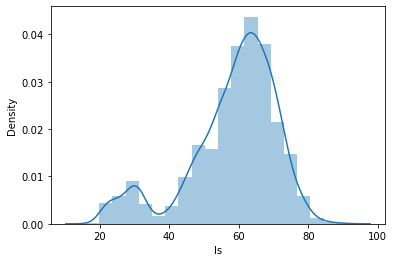

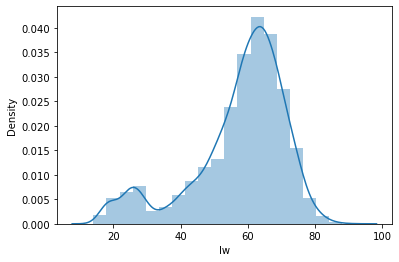

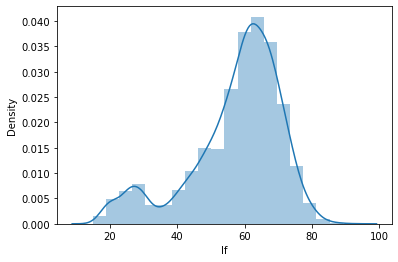

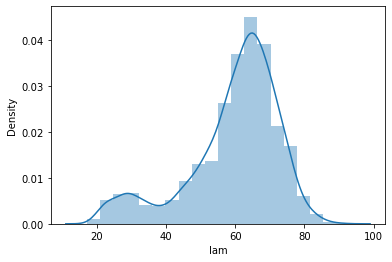

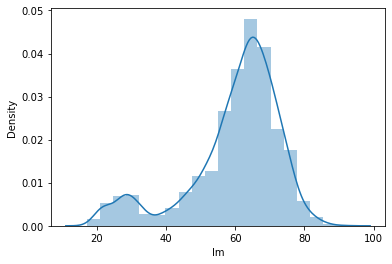

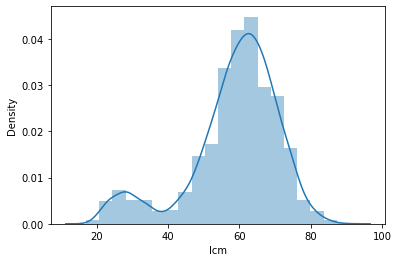

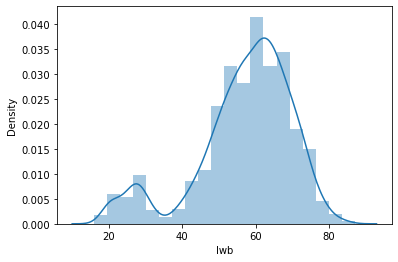

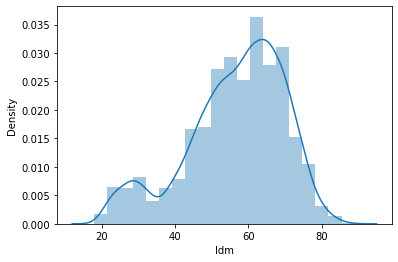

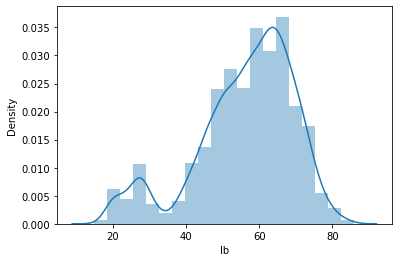

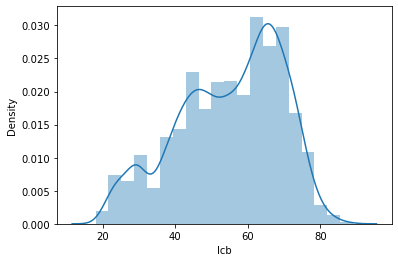

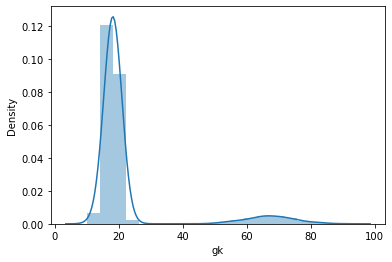

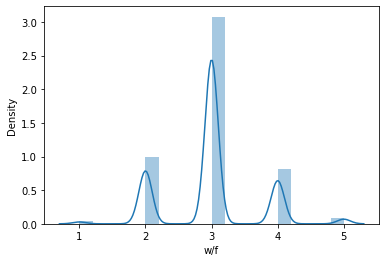

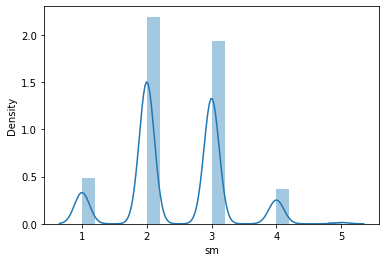

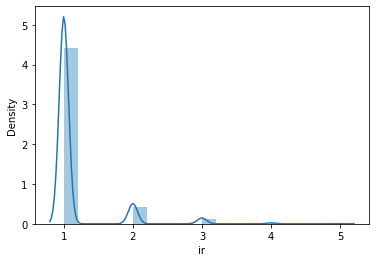

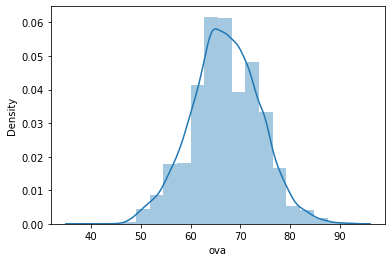

In [1070]:
for val in concanated_data.columns:
    sns.distplot(concanated_data[val], bins=20)
    plt.show()

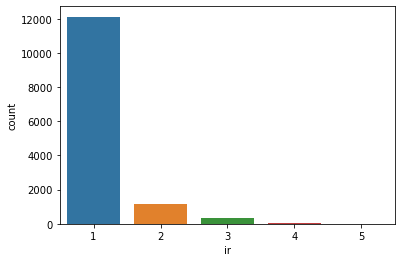

0.05109489051094891 %
7


In [1071]:
sns.countplot(x="ir", data=concanated_data)
plt.show()
print(sum(concanated_data["ir"]==5)/len(concanated_data["ir"])*100,"%")
print(sum(concanated_data["ir"]==5))

In [1072]:
print(sum(concanated_data["ir"]==4)/len(concanated_data["ir"])*100,"%")
print(sum(concanated_data["ir"]==4))

0.40145985401459855 %
55


In [1073]:
print(sum(concanated_data["ir"]==3)/len(concanated_data["ir"])*100,"%")
print(sum(concanated_data["ir"]==3))

2.4744525547445257 %
339


In [1074]:
print(sum(concanated_data["ir"]==2)/len(concanated_data["ir"])*100,"%")
print(sum(concanated_data["ir"]==2))

8.62043795620438 %
1181


In [1075]:
# Using 3 cats for "ir": 1, 2 and >= 3  => using value 3 for values 4 and 5
concanated_data[concanated_data["ir"]>= 3] = 3

In [1076]:
#concanated_data[concanated_data["sm"]>= 4] = 4

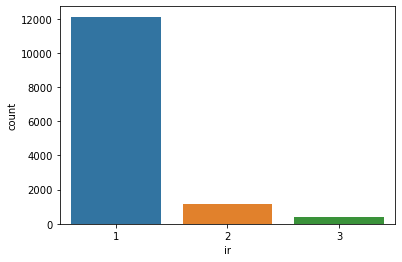

In [1077]:
sns.countplot(x="ir", data=concanated_data)
plt.show()

In [1078]:
#xt, lmbda = stats.boxcox(concanated_data['gk'])

In [1079]:
#sns.distplot(xt, bins=10)
#plt.show()

In [1080]:
#concanated_data["gk_cox"] = xt

In [1081]:
#concanated_data["gk_cox"].describe(include=all)

In [1082]:
#iqr = np.percentile(concanated_data['gk_cox'],75) - np.percentile(concanated_data['gk_cox'],25)
#upper_limit = np.percentile(concanated_data['gk_cox'],75) + 1.5*iqr
#lower_limit = np.percentile(concanated_data['gk_cox'],25) - 1.5*iqr

In [1083]:
#subset = concanated_data.copy()

In [1084]:
#subset.shape

In [1085]:
#concanated_data.shape

In [1086]:
#subset = subset[(subset['gk_cox']>lower_limit) & (subset['gk_cox']<upper_limit)]

In [1087]:
#concanated_data.shape[0]/(subset.shape[0]-concanated_data.shape[0])

In [1088]:
#concanated_data.head()

In [1089]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
#claim_log = list(map(log_transfom_clean, numerical['customer_lifetime_value']))
#sns.distplot(claim_log)
#plt.show(

In [1090]:
concanated_data['gk_log'] = list(map(log_transfom_clean, concanated_data['gk']))
#log_target = np.log1p(df["Target"])

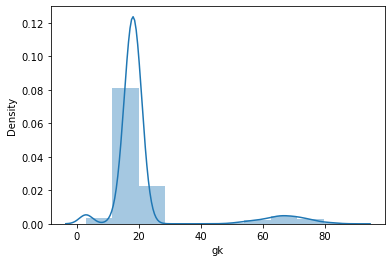

In [1091]:
sns.distplot(concanated_data['gk'], bins=10)
plt.show()

In [1092]:
#sns.distplot(concanated_data['gk_cox'], bins=10)
#plt.show()

In [1093]:
#sns.distplot(concanated_data['gk_log'], bins=10)
#plt.show()

In [1094]:
#subset=concanated_data.copy()

In [1095]:
#iqr = np.percentile(subset['gk_log'],75) - np.percentile(subset['gk_log'],25)
#upper_limit = np.percentile(subset['gk_log'],75) + 1.5*iqr
#lower_limit = np.percentile(subset['gk_log'],25) - 1.5*iqr
#subset = subset[(subset['gk_log']>lower_limit) & (subset['gk_log']<upper_limit)]

In [1096]:
#subset.shape[0]-concanated_data.shape[0]

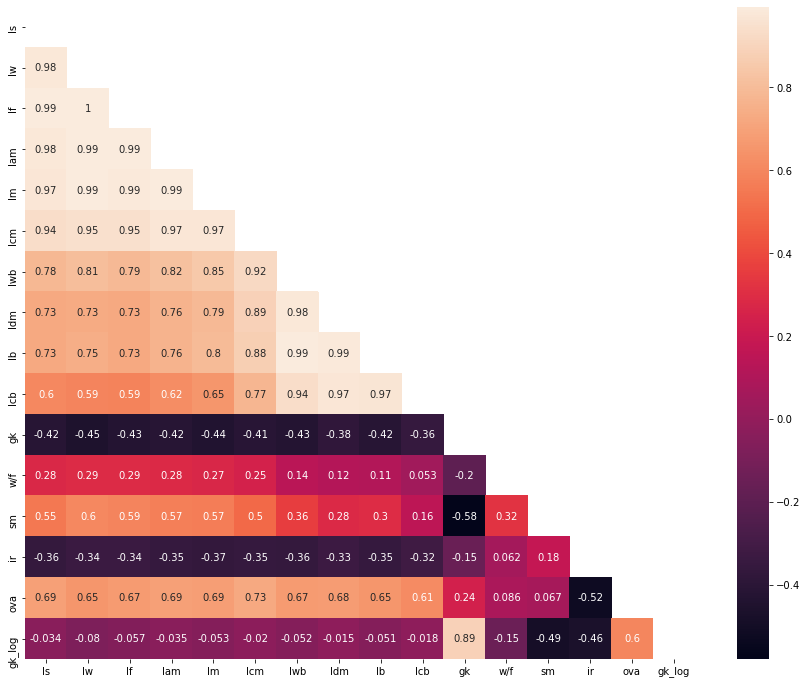

In [1097]:
correlations_matrix = concanated_data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [1098]:
multicorrelation_list = ['ls','lf','lam','lm','lw','lwb','lb','lcb']
#keep : lcm, gk, ldm | Thresholdvalue >= 0.9 as correlation

In [1099]:
#subset_multi = concanated_data.copy()
#subset_multi = subset_multi.drop(multicorrelation_list, axis=1)

In [1100]:
#subset_multi.head()

In [1101]:
#correlations_matrix_multi = subset_multi.corr()
#mask = np.zeros_like(correlations_matrix_multi)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.heatmap(correlations_matrix_multi, mask=mask, annot=True)
#plt.show()

In [1102]:
concanated_data = concanated_data.drop(multicorrelation_list, axis=1)

In [1103]:
#concanated_data.head()

In [1104]:
concanated_data = concanated_data.drop(['gk'], axis=1)

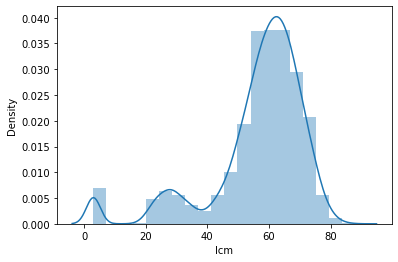

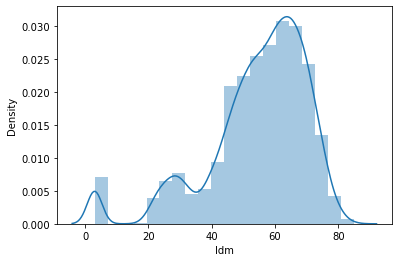

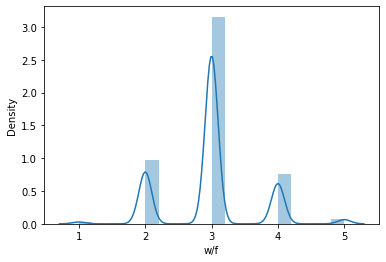

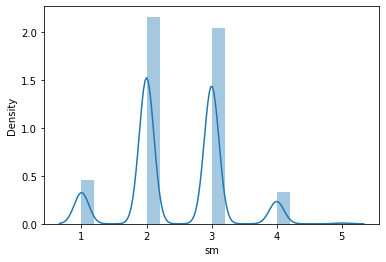

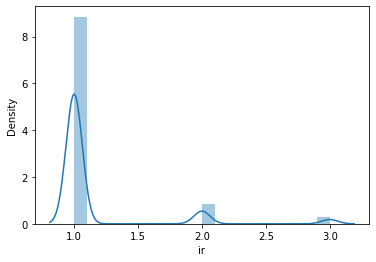

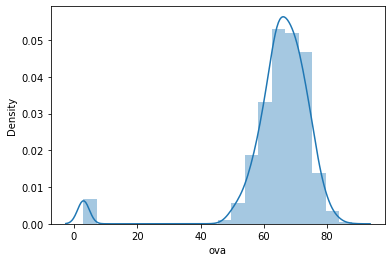

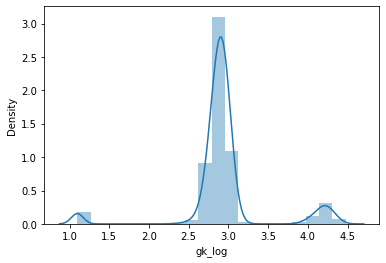

In [1105]:
for val in concanated_data.columns:
    sns.distplot(concanated_data[val], bins=20)
    plt.show()

In [1106]:
#concanated_data['lcm_log'] = list(map(log_transfom_clean, concanated_data['lcm']))
#concanated_data['ldm_log'] = list(map(log_transfom_clean, concanated_data['ldm']))

#we first go without any scaling on lcm and ldm

In [1107]:
concanated_data.head()

,lcm,ldm,w/f,sm,ir,ova,gk_log
0,64,60,4,2,1,64,2.772589
1,70,55,3,4,2,77,2.995732
2,76,58,4,4,2,80,2.639057
3,58,60,2,2,1,59,2.772589
4,65,66,2,3,1,65,2.833213


In [1108]:
#subset=concanated_data.copy()
#iqr = np.percentile(subset['gk_log'],75) - np.percentile(subset['gk_log'],25)
#upper_limit = np.percentile(subset['gk_log'],75) + 1.5*iqr
#lower_limit = np.percentile(subset['gk_log'],25) - 1.5*iqr
#subset = subset[(subset['gk_log']>lower_limit) & (subset['gk_log']<upper_limit)]

In [1109]:
#for val in subset.columns:
#    sns.distplot(subset[val], bins=20)
#    plt.show()

In [1110]:
#concanated_data = concanated_data.drop(['lcm_log','ldm_log'],axis=1)

In [1111]:
# Removing outliers of gk
model_data =concanated_data.copy()
iqr = np.percentile(model_data['gk_log'],75) - np.percentile(model_data['gk_log'],25)
upper_limit = np.percentile(model_data['gk_log'],75) + 1.5*iqr
lower_limit = np.percentile(model_data['gk_log'],25) - 1.5*iqr
model_data = model_data[(model_data['gk_log']>lower_limit) & (model_data['gk_log']<upper_limit)]

In [1112]:
Y = model_data['ova']
X = model_data.drop(['ova'], axis=1)
Y.head()

0    64
1    77
2    80
3    59
4    65
Name: ova, dtype: int64

In [1113]:
X.head()

,lcm,ldm,w/f,sm,ir,gk_log
0,64,60,4,2,1,2.772589
1,70,55,3,4,2,2.995732
2,76,58,4,4,2,2.639057
3,58,60,2,2,1,2.772589
4,65,66,2,3,1,2.833213


In [1114]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)

(11912, 6)


In [1115]:
pd.DataFrame(x_standardized).head()

,0,1,2,3,4,5
0,0.324143,0.076634,1.506403,-0.916671,-0.310101,-1.231010
1,1.048274,-0.421384,-0.031897,2.202263,3.224755,1.053035
2,1.772405,-0.122573,1.506403,2.202263,3.224755,-2.597806
3,-0.399988,0.076634,-1.570197,-0.916671,-0.310101,-1.231010
4,0.444831,0.674257,-1.570197,0.642796,-0.310101,-0.610471


In [1116]:
X_train, X_test, y_train, y_test = train_test_split(x_standardized, Y, test_size=0.3, random_state=100)

In [1117]:
# Buidling the model with removed outliers:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.6978119019790767

In [1118]:
# When removing the outliers of the gk-column, the r2_score is reduced to 0.7 
# When not removing the outliers of the gk-column, the r2_score is above 0.9
# Decission: We are keeping the outliers:

In [1119]:
model_data = concanated_data.copy()

In [1120]:
Y = model_data['ova']
X = model_data.drop(['ova'], axis=1)
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_standardized, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2=r2_score(y_test, predictions)

In [1121]:
# Good-job!

In [1122]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [1123]:
r2

0.9182664475969885

In [1124]:
adj_r2

0.9181469249758776

In [1125]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

In [1126]:
print(mse)
print(rmse)

13.879311382737107
3.7254947836142662
